In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [108]:
ds = xr.open_dataset('../../processed2/tif_94.nc')

In [109]:
ds

<xarray.Dataset>
Dimensions:                             (y: 3000, x: 3000)
Coordinates:
  * x                                   (x) float64 2.92e+05 ... 3.82e+05
  * y                                   (y) float64 4.372e+06 ... 4.282e+06
Data variables: (12/15)
    Landsat_Blue_Vis_Sfc_Reflectance    (y, x) float64 ...
    Landsat_Red_Vis_Sfc_Reflectance     (y, x) float64 ...
    Landsat_NIR_Sfc_Reflectance         (y, x) float64 ...
    Landsat_SWIR1_Sfc_Reflectance       (y, x) float64 ...
    Landsat_SWIR2_Sfc_Reflectance       (y, x) float64 ...
    Landsat_LST                         (y, x) float64 ...
    ...                                  ...
    GOES_NIR_Veggie_Reflectance         (y, x) float64 ...
    GOES_NIR_SnowIce_Reflectance        (y, x) float64 ...
    GOES_NIR_CloudParticle_Reflectance  (y, x) float64 ...
    GOES_LWIR_Brightness_Temp           (y, x) float64 ...
    GOES_Dirty_LWIR_Brightness_temp     (y, x) float64 ...
    spatial_ref                         int64 ...
Attributes:
    AREA_OR_POINT:    Area
    scale_factor:     1.0
    add_offset:       0.0
    long_name:        ['SR_B2', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'ST_B10',...
    Cloud_Mask_Bits:  Bit 0: Fill\nBit 1: Dilated Cloud\nBit 2: Cirrus (high ...
    Datetime:         2024-07-08 11:46:17

In [138]:
ds.Landsat_Cloud_Mask.values[0,0][-8] + ds.Landsat_Cloud_Mask.values[0,0][-4:-1]

'0110'

In [140]:
water = np.array([[s[-8]+s[-4:-1] for s in line] for line in ds.Landsat_Cloud_Mask.values])

In [141]:
mask = (water == '0000')*1

In [142]:
np.sum((ds.Landsat_LST)*mask == 0)

<xarray.DataArray 'Landsat_LST' ()>
array(3646546)

In [144]:
dss = ds.sel(x=slice(354000,363500)).sel(y=slice(4354500,4345000))

In [145]:
water = np.array([[s[-8]+s[-4:-1] for s in line] for line in dss.Landsat_Cloud_Mask.values])

In [146]:
mask = (water == '0000')*1

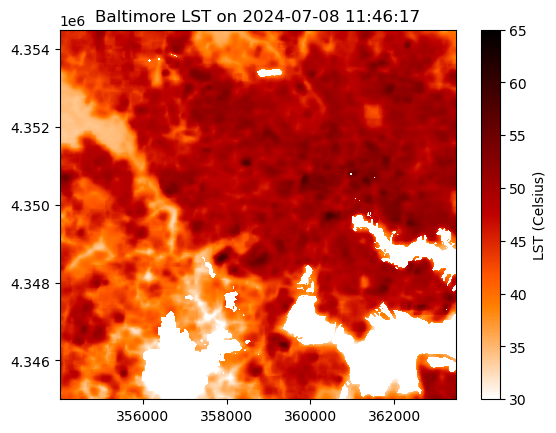

In [150]:
f=plt.figure()
ax = f.add_subplot()
plt.contourf(dss.x,dss.y,dss.Landsat_LST*mask-273.15,cmap=plt.cm.gist_heat_r, levels=np.linspace(30,65,1000))
#ax.set_xticklabels(dss.x.values[0::300], rotation=45)
#plt.xlabel('longitude')
#plt.ylabel('latitude')
plt.title(f'Baltimore LST on {ds.Datetime}')
cb=plt.colorbar(ticks = list(np.arange(30, 66, 5)))
cb.set_label('LST (Celsius)')
#plt.savefig('march_slp.png')